This jupyter notebook contains the visual representation for the answer to that question : 

    5)Which cars are in the greatest demand? Which cars have the best CR(Conversion Rate) for targeted events?  

Author : Umidjon Sattorov. Student at Skillbox platform

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df_sessions = pd.read_csv(filepath_or_buffer = './data/ga_sessions.csv')
df = pd.read_csv(filepath_or_buffer = "./data/ga_hits.csv")
total_dataframe = pd.merge(left = df, right = df_sessions, on = "session_id")

C:\Users\User\AppData\Local\Temp\ipykernel_6304\1311346234.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv(filepath_or_buffer = './data/ga_sessions.csv')


In [3]:
cars = total_dataframe[(total_dataframe.hit_page_path.str.contains(r'\bsberauto.com/cars/all')) | total_dataframe.hit_page_path.str.contains(r'\bsberauto-team.com/cars/all')]
total_dataframe['car_manufacturer'] = cars.hit_page_path.apply(lambda x : x.split('/')[3])
total_dataframe['car_model'] = cars.hit_page_path.apply(lambda x : x.split('/')[4])

In [5]:
len(total_dataframe)

15685219

In [4]:
total_dataframe['car_model'].isna().sum()

12298355

In [10]:
x = total_dataframe['car_model'].value_counts().index[0:10]
y = total_dataframe['car_model'].value_counts().values[0:10]

In [7]:
total_dataframe['car_model'].nunique()

71

C:\Users\User\AppData\Local\Temp\ipykernel_6304\661505067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = x, y = y, palette = 'icefire')


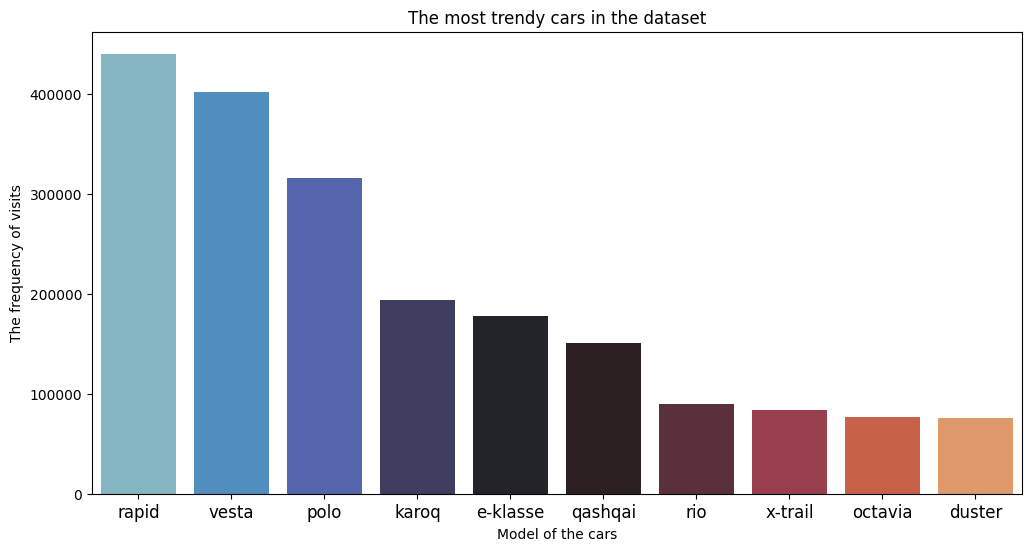

In [19]:
plt.figure(figsize = (12, 6))
barplot = sns.barplot(x = x, y = y, palette = 'icefire')
plt.title(label = "The most trendy cars in the dataset")
plt.xlabel(xlabel = "Model of the cars")
plt.ylabel(ylabel = "The frequency of visits")

barplot.tick_params(axis='x', labelsize=12)
plt.show()

Calculating the Conversion Rate for car model 

In [21]:
def cr_calculator(df, value, given_column, target_column) : 
    """
        This function calculates the conversion rate of given_column to target column for given value.

        df : dataframe which includes the implemented data 
        value : value of the given column
        
        warning : target_column should be the int format in order to calculate the conversion rate.
    """
    model_data = df[df[given_column] == value]

    p_model = model_data[target_column].mean()
    n_model = model_data.shape[0]
    x_model = model_data[target_column].sum()

    cv_rate = x_model / n_model
    std_error = np.sqrt(cv_rate * (1 - cv_rate) * (1 / n_model))

    return cv_rate, std_error


In [22]:
#Labelling target action column with 1 if the action in the row of the given dataset is target action and 0 if the action is not the action which we are considering
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']
total_dataframe['target_action'] = 0
total_dataframe.loc[total_dataframe['event_action'].isin(target_actions), 'target_action'] = 1
total_dataframe[total_dataframe['event_action'].isin(target_actions)]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,car_manufacturer,car_model,target_action
239,6466333295973247896.1640246168.1640246168,2021-12-23,2442217.0,87,event,NaN,sberauto.com/cars/all/skoda/octavia/4791c8b2?u...,sub_button_click,sub_car_claim_submit_click,NaN,...,Windows,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,skoda,octavia,1
261,6466333295973247896.1640246168.1640246168,2021-12-23,2442533.0,88,event,NaN,sberauto.com/cars/all/skoda/octavia/4791c8b2?u...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,...,Windows,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,skoda,octavia,1
279,6466333295973247896.1640246168.1640246168,2021-12-23,2434942.0,86,event,NaN,sberauto.com/cars/all/skoda/octavia/4791c8b2?u...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,Windows,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,skoda,octavia,1
1140,3509799545959915269.1640275720.1640275720,2021-12-23,39533.0,9,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,Android,Huawei,NaN,360x780,Chrome,Russia,Tula,skoda,rapid,1
1179,6661709970993885304.1640280200.1640280200,2021-12-23,34986.0,9,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,Android,Samsung,NaN,412x915,Android Webview,Russia,Saint Petersburg,skoda,rapid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682773,3906921911594195664.1640176339.1640176339,2021-12-22,8846.0,5,event,NaN,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,...,Android,Xiaomi,NaN,360x760,Chrome,Russia,Moscow,NaN,NaN,1
15683864,3487456408821107745.1636356536.1636356536,2021-11-08,0.0,1,event,NaN,localhost/cars/all/hyundai/solaris/b82590a3?ab...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,iOS,Apple,NaN,390x844,Safari,Russia,Domodedovo,NaN,NaN,1
15684166,2449210543906459314.1638895283.1638895283,2021-12-07,20720.0,4,event,NaN,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,...,Android,Xiaomi,NaN,873x393,Chrome,Russia,Moscow,NaN,NaN,1
15684657,6896749247357807171.1639213519.1639213519,2021-12-11,66501.0,4,event,NaN,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,...,Android,Samsung,NaN,320x534,Chrome,Russia,Saint Petersburg,NaN,NaN,1


In [26]:
cv_dataframe = total_dataframe[['car_model', 'target_action']].dropna()
cv_dataframe['target_action'].value_counts()

target_action
0    3356504
1      30360
Name: count, dtype: int64

In [30]:
cv_rate_dict = {}

for i in cv_dataframe['car_model'].unique():
    cv_rate_dict[i] = cr_calculator(cv_dataframe, i, 'car_model', 'target_action')[0]
    print(f"The conversion rate for {i} car model is equal to : {cr_calculator(cv_dataframe, i, 'car_model', 'target_action')[0]}")

The conversion rate for seltos car model is equal to : 0.009265198489059939
The conversion rate for tiguan car model is equal to : 0.0046834991735001455
The conversion rate for s90 car model is equal to : 0.0046828851235815325
The conversion rate for octavia car model is equal to : 0.011024154338160735
The conversion rate for polo car model is equal to : 0.014306808963699047
The conversion rate for karoq car model is equal to : 0.006626104995897388
The conversion rate for rio car model is equal to : 0.015696140530551815
The conversion rate for qashqai car model is equal to : 0.005280953361542703
The conversion rate for cla-klasse car model is equal to : 0.01002961123316458
The conversion rate for 2-serii car model is equal to : 0.0036888888888888887
The conversion rate for 7-serii car model is equal to : 0.004602356406480118
The conversion rate for gla-klasse car model is equal to : 0.004085634907664651
The conversion rate for camry car model is equal to : 0.01567853520817915
The conve

In [31]:
import heapq 

top_ten = heapq.nlargest(10, cv_rate_dict.items(), key = lambda item : item[1])

print(top_ten)

[('x1', 0.17142857142857143), ('arkana', 0.0599721059972106), ('civic-type-r', 0.05660377358490566), ('x3-m', 0.05333333333333334), ('cerato', 0.022243256034074774), ('solaris', 0.01809552061702759), ('rio', 0.015696140530551815), ('camry', 0.01567853520817915), ('polo', 0.014306808963699047), ('rapid', 0.01321778930090109)]
